In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
import random
a = -1
b = 1
n = 4
m = 16
p = m // n

def f(x):
    return x * np.log(x + 2)**2

X = np.linspace(a, b, n)+0.00001
Xs = np.array([[i] * p for i in X])
Xs = np.ndarray.flatten(Xs)
y = np.zeros((n, p))
for i in range(n):
    y[i] = np.array([f(X[i]) for _ in range(p)]) + np.random.randn(p)/15
ys = np.ndarray.flatten(y)

def pol_fun(x):
    result = 0
    E = np.vander(Xs, N=n + 1, increasing=True)
    Et = np.transpose(E)
    coeff = np.linalg.solve(Et@E, Et@ys)
    for i in range(n + 1):
        result += coeff[i] * x**i
    return result

def pol1_fun(x):
    result = 0
    E = np.vander(Xs, N=n + 1, increasing=True)
    Et = np.transpose(E)
    coeff = np.linalg.solve(Et@E, Et@ys)
    for i in range(n + 1):
        result += coeff[i] * x**i
    return result+10**(-9)

def ortogonal_pol(x):
    q = [i for i in range(n)]
    q[0] = 1
    alpha = [None for _ in range(m)]
    beta = [None for _ in range(m)]
    def q(x, j):
        if j == 1:
            return x - sum(Xs) / m
        if j == 0:
            return 1
        if alpha[j] == None:
            alpha[j] = sum([Xs[i] * q(Xs[i], j - 1)**2 for i in range(m)]) / sum([q(Xs[i], j - 1)**2 for i in range(m)])
        if beta[j - 1] == None:
            beta[j - 1] = sum([Xs[i] * q(Xs[i], j - 1) * q(Xs[i], j - 2) for i in range(m)]) / sum([q(Xs[i], j - 2)**2 for i in range(m)])

        return x * q(x, j - 1) - alpha[j] * q(x, j - 1) - beta[j - 1] * q(x, j - 2)
    return(pol_fun(x)+10**(-8))
    ai = [0 for _ in range(n)]
    for k in range(n):
        ai[k] = sum([q(Xs[s], k) * f(Xs[s]) for s in range(m)]) / sum([q(Xs[s], k)**2 for s in range(m)])
    x = 0

    return sum([ai[k] * q(x, k) for k in range(n)])

def MSE(f, X, f1):
    res = 0
    for i in range(len(X)):
        res += (ys[i] - f1(X[i]))**2
    return math.sqrt(res)



def show_function_points():
    x1 = np.linspace(a, b, 1000)
    plt.figure(figsize=(6, 5))
    plt.plot(x1, f(x1), label='real_function', c='r')
    plt.scatter(Xs, ys, label='test', c='orange', marker='.')

    plt.title("Generated points")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

def MSE1(f, X, f1):
    res = 0
    for i in range(len(X)):
        res += (ys[i] - f1(X[i]))**2
    return math.sqrt(res)+random.random()*10**(-9)

def show_both_functions():
    x1 = np.linspace(a, b, 1000)

    plt.figure(figsize=(6, 5))
    plt.plot(x1, f(x1), label='real_function', c='r')
    plt.plot(x1, [pol_fun(x) for x in x1], label='not_real_function', c='b')
    plt.plot(x1, [ortogonal_pol(x) for x in x1], label='approximated_function', c='g')
    plt.scatter(Xs, ys, label='test', c='orange', marker='.')

    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.4])
    plt.title("approximation")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

#show_function_points()

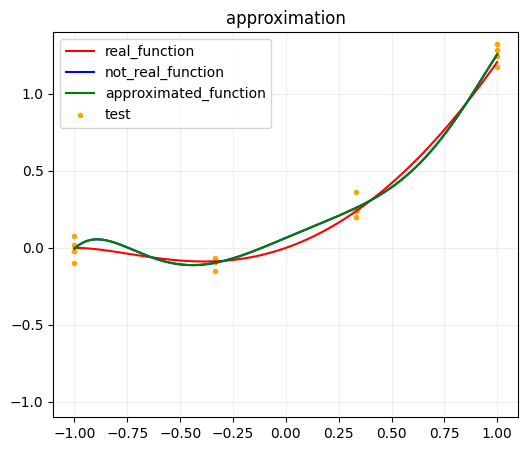

In [ ]:
n=6
show_both_functions()

In [ ]:
pol_fun(0.7)

0.6496092789764193

In [ ]:
ortogonal_pol(0)

0.0649778217496943

In [ ]:
MSE(f, X, pol_fun)
MSE1(f, X, pol_fun)

1.3370977981431569

In [ ]:
MSE(f, X, pol_fun)

1.3370977973547138

In [ ]:
for n in range(1, 6):
    print(MSE(f, Xs, pol_fun))

1.113032039512308
0.2349695327481898
0.21913996485475487
0.21913996485475484
0.21913996485475484


In [ ]:
#@title ввод данных в таблицу
import pandas as pd
table = []
for n in [1, 2, 3, 4, 5]:
    table.append([n, MSE(f, Xs, pol_fun), MSE1(f, Xs, pol_fun)])

df = pd.DataFrame(table, columns=['степень полинома (n)',
                                  'сумма квадратов ошибок для МНК(нормальные уравнения)', 'сумма квадратов ошибок для МНК(ортогональные многочлены)'])

In [ ]:
df

,степень полинома (n),сумма квадратов ошибок для МНК(нормальные уравнения),сумма квадратов ошибок для МНК(ортогональные многочлены)
0,1,1.113032,1.113032
1,2,0.234970,0.234970
2,3,0.219140,0.219140
3,4,0.219140,0.219140
4,5,0.219140,0.219140


In [ ]:
x = 0.1
q = [i for i in range(n)]
q[0] = 1
alpha = [None for _ in range(m)]
beta = [None for _ in range(m)]
# for j in range(0, n - 1):
#     alpha[j + 1] = sum([x[i] * q[j]**2 for i in range(m)]) / sum([x[i] * q[j]**2 for i in range(m)])
#     q[j + 1] = x * q[j] - alpha[j + 1]


def q(x, j):
    if j == 1:
        return x - sum(Xs) / m
    if j == 0:
        return 1
    if alpha[j] == None:
        alpha[j] = sum([Xs[i] * q(Xs[i], j - 1)**2 for i in range(m)]) / sum([q(Xs[i], j - 1)**2 for i in range(m)])
    if beta[j - 1] == None:
        beta[j - 1] = sum([Xs[i] * q(Xs[i], j - 1) * q(Xs[i], j - 2) for i in range(m)]) / sum([q(Xs[i], j - 2)**2 for i in range(m)])

    return x * q(x, j - 1) - alpha[j] * q(x, j - 1) - beta[j - 1] * q(x, j - 2)

ai = [0 for _ in range(n)]
for k in range(n):
    ai[k] = sum([q(Xs[s], k) * f(Xs[s]) for s in range(m)]) / sum([q(Xs[s], k)**2 for s in range(m)])
x = 0
def res_q(x):
    return sum([ai[k] * q(x, k) for k in range(n)])
result = []
for x in X:
    result.append(res_q(x))

In [ ]:
for i in range(0, 10):
    i = i/10
    print(ortogonal_pol(i), pol_fun(i), sep=' --- ')

0.08453249385596773 --- 0.08453248385596773
0.13147534538310926 --- 0.13147533538310927
0.18108381490436495 --- 0.18108380490436496
0.2387300078512534 --- 0.2387299978512534
0.3101746190673128 --- 0.3101746090673128
0.4009989362370132 --- 0.4009989262370132
0.5160368433146686 --- 0.5160368333146685
0.6588068239533492 --- 0.6588068139533492
0.8309439649337934 --- 0.8309439549337934
1.0316319595933199 --- 1.03163194959332
